In [31]:
import math
from random import randint
import random
import matplotlib.pyplot as plt
import numpy as np

#Objective Function number 1
def calculate_PCSI(V_Car, V_Obstcale, D, theta):

    PCSI_Delta_V = (V_Car - V_Obstcale) / D  #V is the velocity and D is the distance between the 2 vechiles or the vechile and the obstcale

    #theta is the angle between the 2 vechiles
    if 0 <= theta <= 15 or 165 <= theta <= 180:
        PCSI_theta = 1
    elif 15 <= theta <= 45 or 135 <= theta <= 165:
        PCSI_theta = 3
    elif 45 <= theta <= 90 or 90 <= theta <= 135:
        PCSI_theta = 2
    else:
        PCSI_theta = 0

    PCSI_mass_ratio = 1 #the mass ratio between the 2 vechiles or the vechile and the obstcale

    total_PCSI = (1/3) * PCSI_Delta_V + (1/3) * PCSI_theta + (1/3) * PCSI_mass_ratio

    return total_PCSI


#Objective Function number 2
def calculate_CSI(length, width):

  e = 0.5 #the coefficient of restitution
  m1 = 1000 #the mass of the vechile
  m2 = 1000 #the mass of the obstcale
  Rk = 1 #the stiffness ratio
  Rm = 1 #the mass ratio
  p1 = 100
  p2 = math.sqrt((m2 * (((3.8 **2) / 12) + ((1.5 ** 2 ) / 12))) / m2)
  h2 = 0.25 * 3.8 #Force Arm for the obstcale
  h1 = 0.25 * length #Force Arm for the vechile
  p1 = math.sqrt((m1 * (((length **2) / 12) + ((width ** 2 ) / 12))) / m1) #the radius of gyration for the vechile

  Y1 = (p1**2) / ((p1**2) + (h1**2)) #the radius of gyration for the vechile
  Y2 = (p2**2) / ((p2**2) + (h2**2)) #the radius of gyration for the obstcale



  total_CSI = math.sqrt(( Y1 * Y2 * (1- (e**2) ) ) / ((1 + Rk)  * (Y2 + (Y1 * Rm))))

  return total_CSI




# V_Car = 70
# V_Obstcale = 40
# theta = 30
# D = 2

# PCSI_result = calculate_PCSI(V_Car, V_Obstcale ,D, theta)
# print(f"The Potential Crash Severity Index (PCSI) is: {PCSI_result}")

# e = 0.8
# Rk = 0.9
# Rm = 0.95
# h = 0.25

#CSI_result = calculate_CSI()
#print(f"The Crash Severity Index (CSI) is: {CSI_result}")

The best F is 1.095241331279032
The best V is 67.89681241375676
The best theta is 153.49050033233925


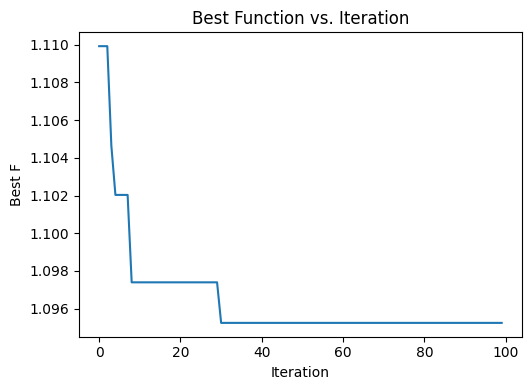

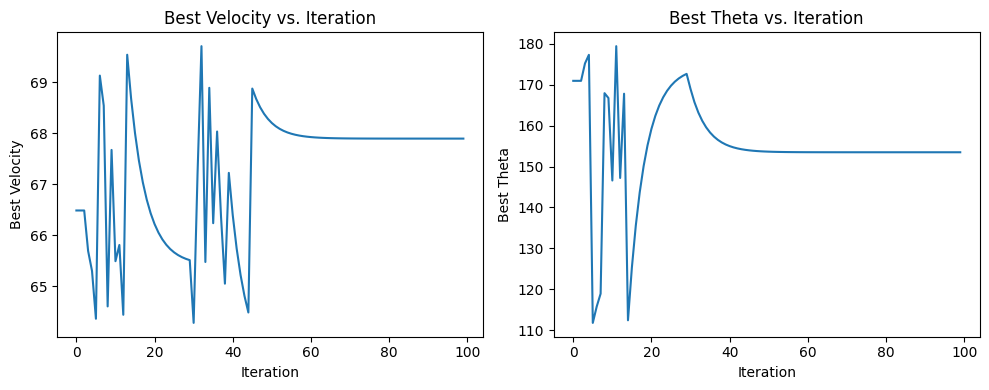

In [33]:
import random

#arrays to store the values
f_best_values = []
v_best_values = []
theta_best_values = []

#PSO Function 1 for PCSI
def PSO1(V_Car, V_Obstcale, D, theta):

    Time_to_Impact = D / (V_Car - V_Obstcale)
    V_Car_Min = (-8 * Time_to_Impact) + V_Car  #minimum vlaue of the Velocity
    V_Reduction_Max = V_Car - V_Car_Min

    #boundiries of the theta
    Theta_max = theta + 40
    Theta_min = theta - 40

    i_max = 100 #num of iterations
    c = 0
    m = 5 #population size
    f_curr = []
    w = 0.792
    c1 = 1.4944
    c2 = 1.4944


    #Initilization of feasible solution
    Sol_curr = [
        [random.uniform(V_Car_Min, V_Car), random.uniform(Theta_min, Theta_max)],
        [random.uniform(V_Car_Min, V_Car), random.uniform(Theta_min, Theta_max)],
        [random.uniform(V_Car_Min, V_Car), random.uniform(Theta_min, Theta_max)],
        [random.uniform(V_Car_Min, V_Car), random.uniform(Theta_min, Theta_max)],
        [random.uniform(V_Car_Min, V_Car), random.uniform(Theta_min, Theta_max)]
    ]

    fitness_arr = [0, 0, 0, 0, 0]  #Array containing the value of the fitness function for each solution

    #calculate the fitness array
    for j in range(5):
      curr = calculate_PCSI(Sol_curr[j][0], V_Obstcale, D, Sol_curr[j][1])
      fitness_arr[j] = curr

    #updating the minimum value
    min = fitness_arr[0] #minimum value so far
    min_index = 0
    ming = fitness_arr[0] #minimum value for this itiration
    ming_index = 0
    for k in range(5):
      if (fitness_arr[k] < min):
        min = fitness_arr[k]
        min_index = k
      if (fitness_arr[k] < ming):
        ming = fitness_arr[k]
        ming_index = k


    #Getting the best decision varibles and function
    f_best = fitness_arr[min_index]
    x_best = Sol_curr[min_index]

    velocity_curr = [[0, 0],[0, 0],[0, 0],[0, 0],[0, 0]]
    velocity_new = [[0, 0],[0, 0],[0, 0],[0, 0],[0, 0]]
    p_best = Sol_curr
    g_best = Sol_curr[min_index]

    while (c < i_max):

      for a in range(5):
        velocity_new[a][0] = w * velocity_curr[a][0] + c1 * round(random.random()) * (p_best[a][0] - Sol_curr[a][0]) + c2 * round(random.random()) * (g_best[0] -  Sol_curr[a][0])
        velocity_new[a][1] = w * velocity_curr[a][1] + c1 * round(random.random()) * (p_best[a][1] - Sol_curr[a][1]) + c2 * round(random.random()) * (g_best[1] -  Sol_curr[a][1])


      #update the current solution
      for b in range(5):
        Sol_curr[b][0] = Sol_curr[b][0] + velocity_new[b][0]
        if(Sol_curr[b][0] < V_Car_Min):
          Sol_curr[b][0] = random.uniform(V_Car_Min, V_Car)

        Sol_curr[b][1] = Sol_curr[b][1] + velocity_new[b][1]
        if(Sol_curr[b][1] < Theta_min):
          Sol_curr[b][1] = random.uniform(Theta_min, Theta_max)
        elif(Sol_curr[b][1] > Theta_max):
          Sol_curr[b][1] = random.uniform(Theta_min, Theta_max)

      #calculate the fitness array
      for d in range(5):
        curr = calculate_PCSI(Sol_curr[d][0], V_Obstcale, D, Sol_curr[d][1])
        fitness_arr[d] = curr

      # min = fitness_arr[0]
      # min_index = 0
      ming = fitness_arr[0]
      ming_index = 0
      for e in range(5):
       if (fitness_arr[e] < min):
         min = fitness_arr[e]
         min_index = e
      if (fitness_arr[e] < ming):
         ming = fitness_arr[e]
         ming_index = e

      g_best = Sol_curr[min_index]
      if(min < f_best):
        f_best = min
        x_best = Sol_curr[min_index]

      for h in range(5):
       if(fitness_arr[h] < calculate_PCSI(p_best[h][0], V_Obstcale, D, p_best[h][1])):
         p_best[h] = Sol_curr[h]

      velocity_curr = velocity_new
      c += 1


      #for the plotting
      f_best_values.append(f_best)
      v_best_values.append(x_best[0])
      theta_best_values.append(x_best[1])



    return f_best, x_best, V_Car_Min




PSO1_Result = PSO1(70, 0, 50, 140)
#print(SA_Result)
print(f"The best F is {PSO1_Result[0]}")
print(f"The best V is {PSO1_Result[1][0]}")
print(f"The best theta is {PSO1_Result[1][1]}")

# #Plotting the graphs

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 2)
plt.plot(f_best_values)
plt.xlabel("Iteration")
plt.ylabel("Best F")
plt.title("Best Function vs. Iteration")

plt.tight_layout()
plt.show()

print()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(v_best_values)
plt.xlabel("Iteration")
plt.ylabel("Best Velocity")
plt.title("Best Velocity vs. Iteration")

plt.subplot(1, 2, 2)
plt.plot(theta_best_values)
plt.xlabel("Iteration")
plt.ylabel("Best Theta")
plt.title("Best Theta vs. Iteration")

plt.tight_layout()
plt.show()


The best F is 0.33541672909157166
The best L is 4.075705292151058
The best W is 1.826830922304722


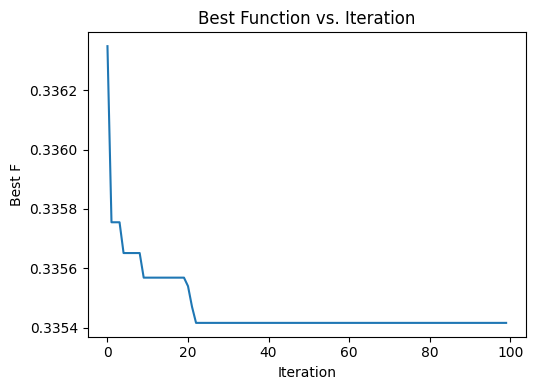

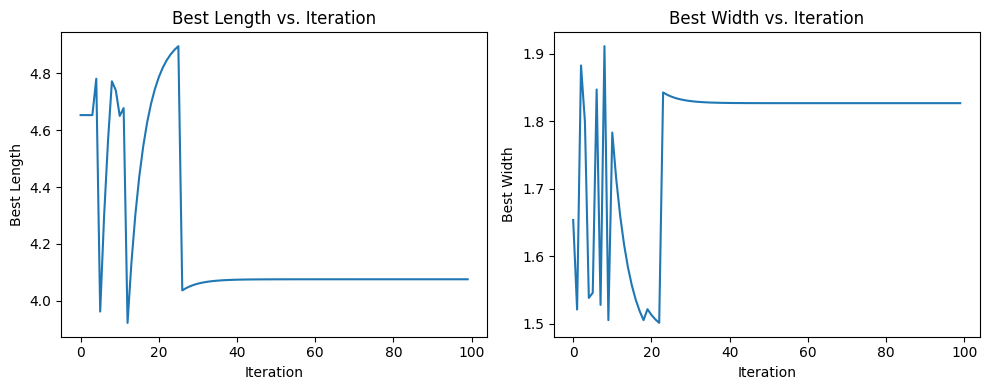

In [36]:
import random

#arrays to store the values
f_best_values = []
L_best_values = []
W_best_values = []


#PSO Function 2 for CSI
def PSO2():


    i_max = 100 #num of iterations
    c = 0
    m = 5 #population size
    f_curr = []
    w = 0.792
    c1 = 1.4944
    c2 = 1.4944


    #Initilization of feasible solution
    #the boundiries of the lenght are (3.8, 4.9) and for the width are (1.5, 2)
    Sol_curr = [
        [random.uniform(3.8, 4.9), random.uniform(1.5, 2)],
        [random.uniform(3.8, 4.9), random.uniform(1.5, 2)],
        [random.uniform(3.8, 4.9), random.uniform(1.5, 2)],
        [random.uniform(3.8, 4.9), random.uniform(1.5, 2)],
        [random.uniform(3.8, 4.9), random.uniform(1.5, 2)]
    ]

    # #Sorting the Solution based of the value of PCSI function
    # sorted_gen_curr = sorted(Gen_old, key=lambda x: calculate_PCSI(x[0], V_Obstcale, D, x[1]))

    fitness_arr = [0, 0, 0, 0, 0]

    #calculate the fitness array
    for j in range(5):
      curr = calculate_CSI(Sol_curr[j][0], Sol_curr[j][1])
      fitness_arr[j] = curr

    min = fitness_arr[0]
    min_index = 0
    ming = fitness_arr[0]
    ming_index = 0
    for k in range(5):
      if (fitness_arr[k] < min):
        min = fitness_arr[k]
        min_index = k
      if (fitness_arr[k] < ming):
        ming = fitness_arr[k]
        ming_index = k


    #Getting the best decision varibles and function
    f_best = fitness_arr[min_index]
    x_best = Sol_curr[min_index]

    velocity_curr = [[0, 0],[0, 0],[0, 0],[0, 0],[0, 0]]
    velocity_new = [[0, 0],[0, 0],[0, 0],[0, 0],[0, 0]]
    p_best = Sol_curr
    g_best = Sol_curr[min_index]

    while (c < i_max):

      for a in range(5):
        velocity_new[a][0] = w * velocity_curr[a][0] + c1 * round(random.random()) * (p_best[a][0] - Sol_curr[a][0]) + c2 * round(random.random()) * (g_best[0] -  Sol_curr[a][0])
        velocity_new[a][1] = w * velocity_curr[a][1] + c1 * round(random.random()) * (p_best[a][1] - Sol_curr[a][1]) + c2 * round(random.random()) * (g_best[1] -  Sol_curr[a][1])


      #update the current solution
      for b in range(5):
        Sol_curr[b][0] = Sol_curr[b][0] + velocity_new[b][0]
        if(Sol_curr[b][0] < 3.8):
          Sol_curr[b][0] = random.uniform(3.8, 4.9)
        elif(Sol_curr[b][0] > 4.9):
          Sol_curr[b][0] = random.uniform(3.8, 4.9)

        Sol_curr[b][1] = Sol_curr[b][1] + velocity_new[b][1]
        if(Sol_curr[b][1] < 1.5):
          Sol_curr[b][1] = random.uniform(1.5, 2)
        elif(Sol_curr[b][1] > 2):
          Sol_curr[b][1] = random.uniform(1.5, 2)

      #calculate the fitness array
      for d in range(5):
        curr = calculate_CSI(Sol_curr[d][0], Sol_curr[d][1])
        fitness_arr[d] = curr

      # min = fitness_arr[0]
      # min_index = 0
      ming = fitness_arr[0]
      ming_index = 0
      for e in range(5):
       if (fitness_arr[e] < min):
         min = fitness_arr[e]
         min_index = e
      if (fitness_arr[e] < ming):
         ming = fitness_arr[e]
         ming_index = e

      g_best = Sol_curr[min_index]
      if(min < f_best):
        f_best = min
        x_best = Sol_curr[min_index]

      for h in range(5):
       if(fitness_arr[h] < calculate_CSI(p_best[h][0],  p_best[h][1])):
         p_best[h] = Sol_curr[h]

      velocity_curr = velocity_new
      c += 1


      #for the plotting
      f_best_values.append(f_best)
      L_best_values.append(x_best[0])
      W_best_values.append(x_best[1])



    return f_best, x_best




PSO2_Result = PSO2()
#print(SA_Result)
print(f"The best F is {PSO2_Result[0]}")
print(f"The best L is {PSO2_Result[1][0]}")
print(f"The best W is {PSO2_Result[1][1]}")

# #Plotting the graphs

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 2)
plt.plot(f_best_values)
plt.xlabel("Iteration")
plt.ylabel("Best F")
plt.title("Best Function vs. Iteration")

plt.tight_layout()
plt.show()

print()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(L_best_values)
plt.xlabel("Iteration")
plt.ylabel("Best Length")
plt.title("Best Length vs. Iteration")

plt.subplot(1, 2, 2)
plt.plot(W_best_values)
plt.xlabel("Iteration")
plt.ylabel("Best Width")
plt.title("Best Width vs. Iteration")

plt.tight_layout()
plt.show()
